In [21]:
%matplotlib inline
import re
import matplotlib.pyplot as plt 


In [22]:
def find_numbers(text):
    expr =r"[-+]?\d*\.\d+|\d+"
    matches=re.findall(expr,text)
    #print (matches)
    return matches

In [24]:


class stateBounds():
    def __init__(self,up,lp,ur,lr,uc,lc,arr):
        if arr:
            self.upperP = up
            self.lowerP = lp
            self.upperR = ur
            self.lowerR = lr
            self.upperC = uc
            self.lowerC = lc

        else:
            self.upperP = float(up)
            self.lowerP = float(lp)
            self.upperR = float(ur)
            self.lowerR = float(lr)
            self.upperC = float(uc)
            self.lowerC = float(lc)
        self.isArr = arr

    def __str__(self):
        if self.isArr:
            return "[P:%s,%s|R:%s,%s|C:%s,%s]" % (str(self.upperP),str(self.lowerP),
                                                  str(self.upperR),str(self.lowerR),str(self.upperC),str(self.lowerC))
        else:
            return "[P:%f,%f|R:%f,%f|C:%f,%f]" % (self.upperP,self.lowerP,self.upperR,self.lowerR,self.upperC,self.lowerC)

    def __repr__(self):
        return str(self)



In [25]:
def extractBoundsFromDict(bounds):
    ups =[]
    lps =[]
    urs = []
    lrs = []
    ucs = []
    lcs = []
    states=[]
    for s in bounds:
        sb = bounds[s]
        ups.append(sb.upperP)
        lps.append(sb.lowerP)
        urs.append(sb.upperR)
        lrs.append(sb.lowerR)
        ucs.append(sb.upperC)
        lcs.append(sb.lowerC)
        states.append(s)
    return (states,ups,lps,urs,lrs,ucs,lcs)

def plot_bounds(bounds):
    (states,ups,lps,urs,lrs,ucs,lcs) = extractBoundsFromDict(bounds)
    plt.plot(ups)
    


In [27]:


def process_bounds(fn):
    numStateVars = 3
    pBounds = [3,4]
    rBounds = [5,6]
    cBounds = [7,8]
    bounds={}

    with open(fn) as f:
        for line in f.readlines():
            matches = find_numbers(line)
            if(len(matches))>8:
                state = tuple(matches[0:numStateVars])
                #print(state)
                upperP = matches[pBounds[0]]
                lowerP = matches[pBounds[1]]
                upperR = matches[rBounds[0]]
                lowerR = matches[rBounds[1]]
                upperC = matches[cBounds[0]]
                lowerC = matches[cBounds[1]]
                sb = stateBounds(upperP, lowerP, upperR, lowerR, upperC, lowerC,False)
                bounds[state]=sb
    return bounds




In [81]:
def process_allBounds(allBounds):
    allBs={}
    for bounds in allBounds:
        #print (bounds)
        for state in bounds:
            #print(state)
            if state in allBs:
                s = bounds[state]
                allBs[state].upperP.append(s.upperP)
                allBs[state].lowerP.append(s.lowerP)
                allBs[state].upperR.append(s.upperR)
                allBs[state].lowerR.append(s.lowerR)
                allBs[state].upperC.append(s.upperC)
                allBs[state].lowerC.append(s.lowerC)
            else:
                s = bounds[state]
                sb = stateBounds([s.upperP],[s.lowerP],[s.upperR],[s.lowerR],[s.upperC],[s.lowerC],True)
                allBs[state] = sb 
    return allBs 
    
def plot_allBsForState(allBounds, state):
    if(state in allBounds):
        b = allBounds[state]
        x = range(len(allBounds[state].upperP))
        #print(x)
        #plt.subplot(131)
        plt.subplot(121)
        up, = plt.plot(x,b.upperP,"r--o",label="uP")
        plt.legend(handles=[up]) 
        plt.title(str(state))
        plt.subplot(122)
        lp, = plt.plot(x,b.lowerP,"b--o",label="lP")
        plt.legend(handles=[lp]) 
        plt.title(str(state))
        
        plt.show()
        
        #plt.subplot(132)
        plt.subplot(121)
        ur, = plt.plot(x,b.upperR,"r--o",label="uR")
        plt.legend(handles=[ur])
        plt.title(str(state))
        plt.subplot(122)
        lr, = plt.plot(x,b.lowerR,"b--o",label="lR")
        plt.legend(handles=[lr])
        plt.title(str(state))
        
        plt.show()
        
        #plt.subplot(133)
        plt.subplot(121)
        uc, = plt.plot(x,b.upperC,"r--o",label="uC")
        plt.legend(handles=[uc])
        plt.title(str(state))
        plt.subplot(122)
        lc, = plt.plot(x,b.lowerC,"b--o",label="lC")
        plt.legend(handles=[lc])
        plt.title(str(state))
        #plt.legend(handles=[up,lp,ur,lr,uc,lc])
        plt.show()

def plot_allBsForStateList(allBounds, states):
    for state in states:
        plot_allBsForState(allBounds,state)
        
def plot_allBs(allBounds):
    for state in allBounds:
        plot_allBsForState(allBounds,state)
        
        
        
        
    


In [88]:
#fnnum = 0
#fnmax = 9
fns=[]
allBounds = []
#for i in range(1,fnmax):
#    fn = "values_"+str(i)+".txt"
#    fns.append(fn)
import os 
for r, d, f in os.walk('.'):
    for fn in f:
        if fn.startswith('values') and fn.endswith('.txt'):
            fns.append(fn)
print(fns)
    


['values_1-1.txt', 'values_4-2.txt', 'values_1-0.txt', 'values_1-7.txt', 'values_1-4.txt', 'values_2-2.txt', 'values_2-1.txt', 'values_3-10.txt', 'values_3-8.txt', 'values_4-1.txt', 'values_2-0.txt', 'values_3-1.txt', 'values_3-7.txt', 'values_3-5.txt', 'values_1-2.txt', 'values_1-3.txt', 'values_1-8.txt', 'values_1-6.txt', 'values_3-9.txt', 'values_3-0.txt', 'values_3-2.txt', 'values_5-1.txt', 'values_5-0.txt', 'values_1-5.txt', 'values_5-2.txt', 'values_3-6.txt', 'values_3-3.txt', 'values_3-4.txt', 'values_4-0.txt']


In [89]:
for fn in fns:
    bounds = process_bounds(fn)
    allBounds.append(bounds)
#print(allBounds)
allBs = process_allBounds(allBounds)
#print (allBs)
#plot_allBs(allBs)


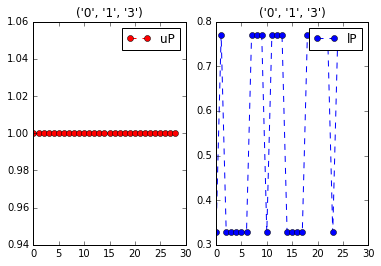

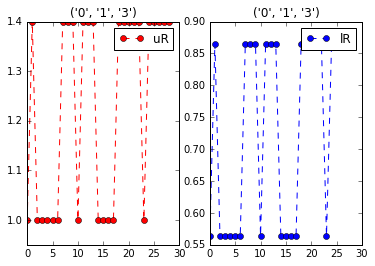

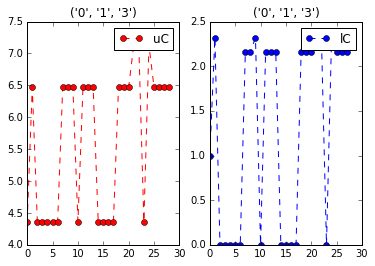

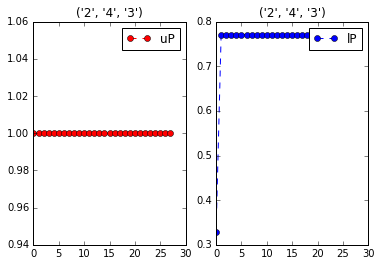

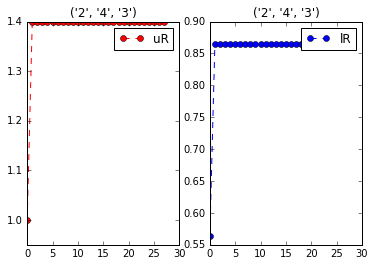

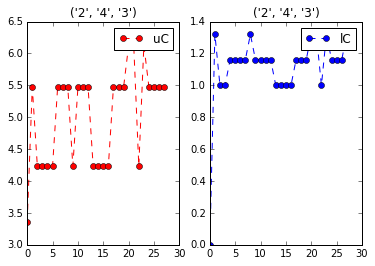

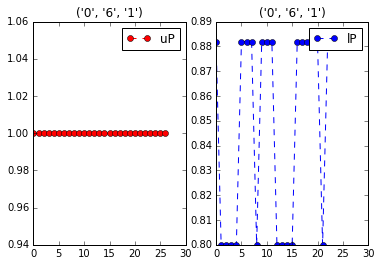

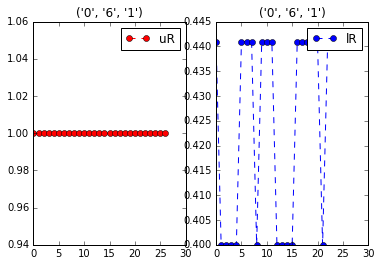

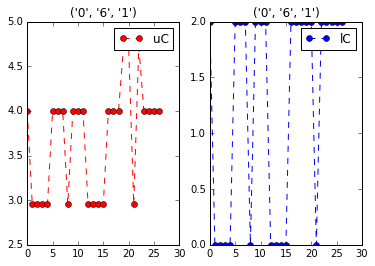

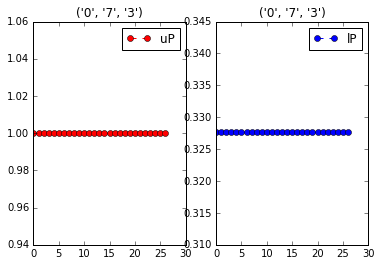

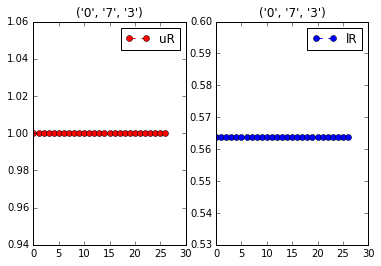

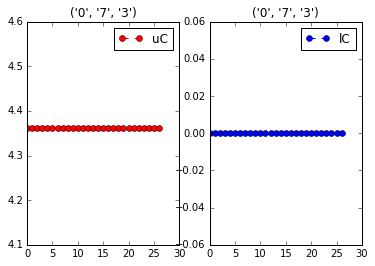

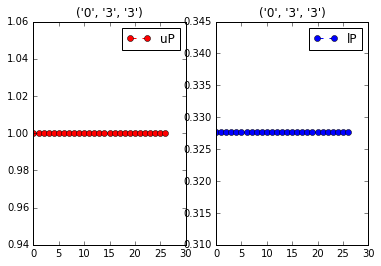

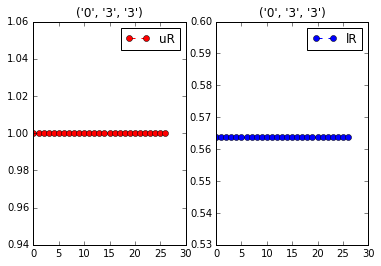

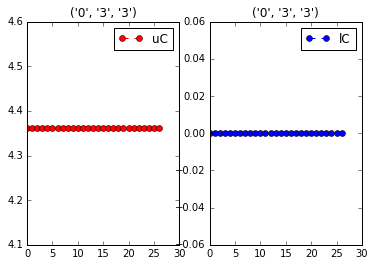

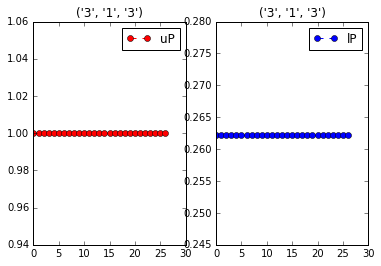

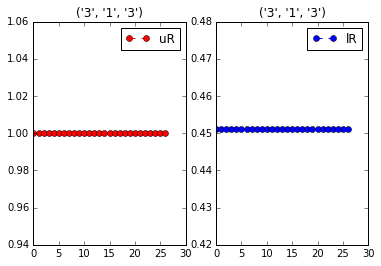

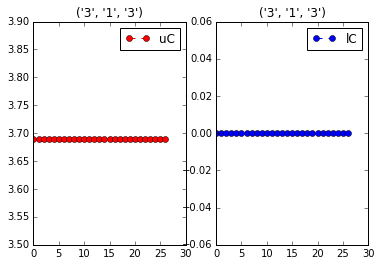

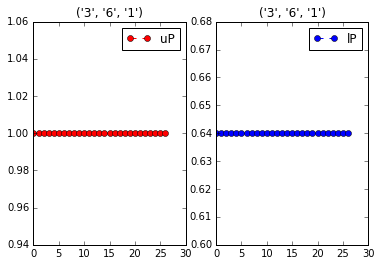

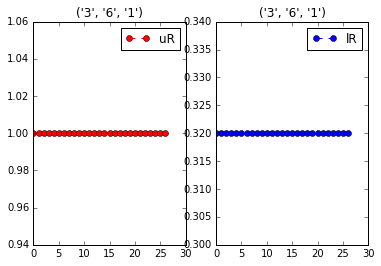

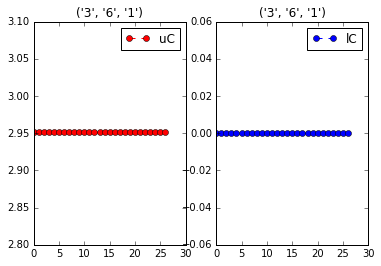

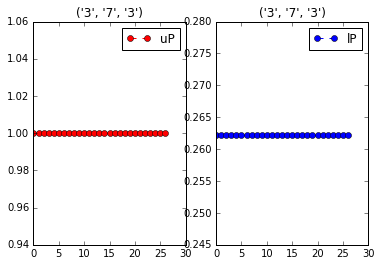

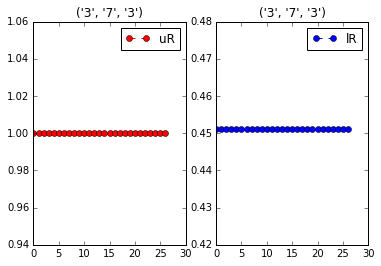

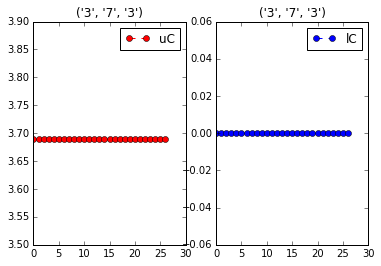

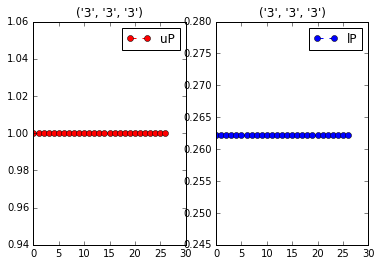

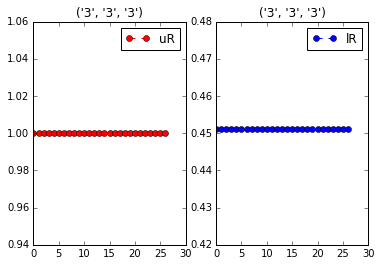

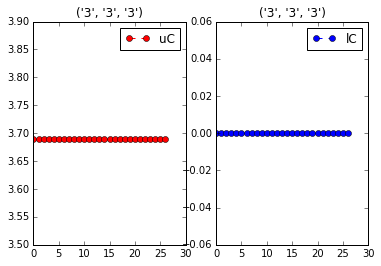

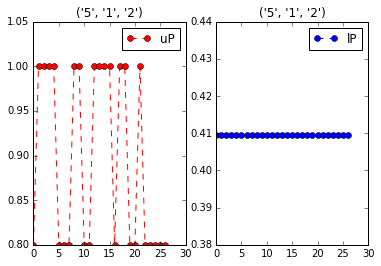

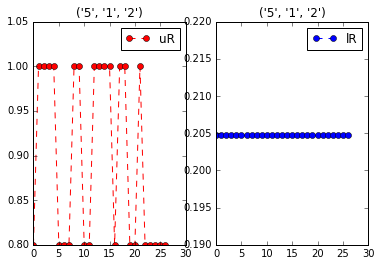

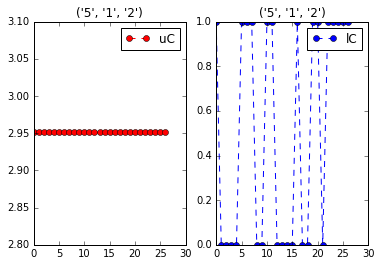

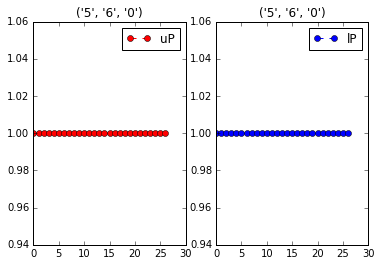

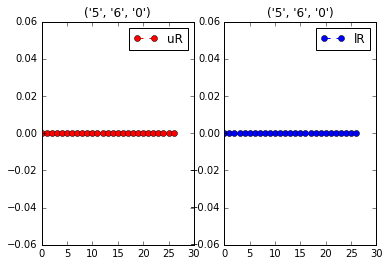

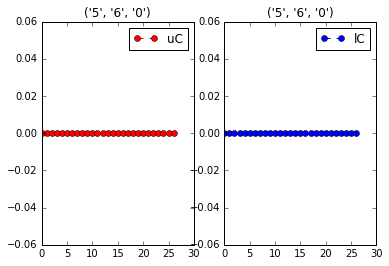

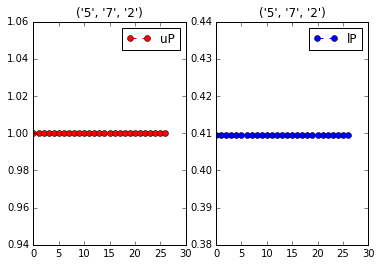

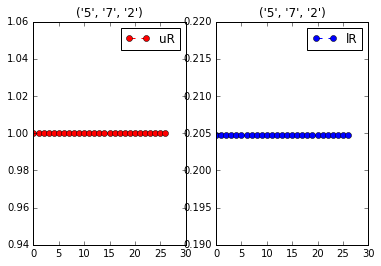

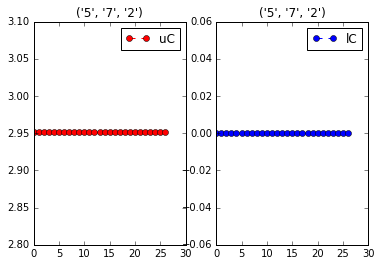

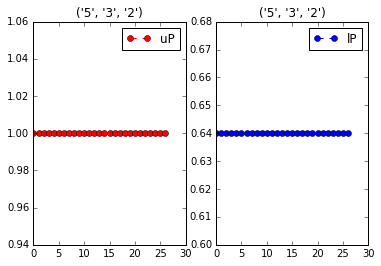

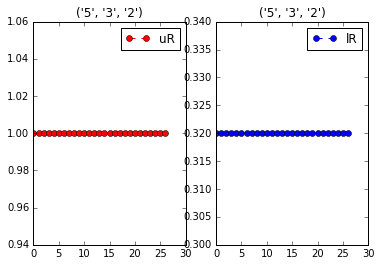

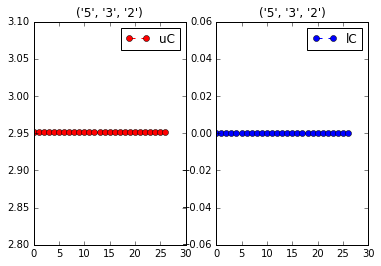

In [90]:
plot_allBsForStateList(allBs,[('0','1','3'),('2','4','3'),
                              ('0','-1','3'),('0','6','1'),
                              ('0','7','3'),('0','3','3'),
                              ('-1','1','3'),('3','1','3'),
                              ('-1','-1','3'),('-1','6','1'),('3','-1','3'),('3','6','1'),
                              ('-1','7','3'),('-1','3','3'),('3','7','3'),('3','3','3'),
                              ('-1','1','3'),('5','1','2'),
                              ('-1','-1','3'),('-1','6','1'),('5','-1','2'),('5','6','0'),
                              ('-1','7','3'),('-1','3','3'),('5','7','2'),('5','3','2')])

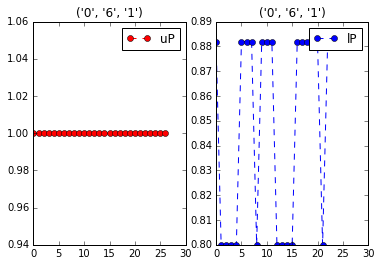

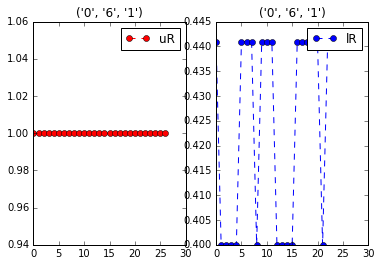

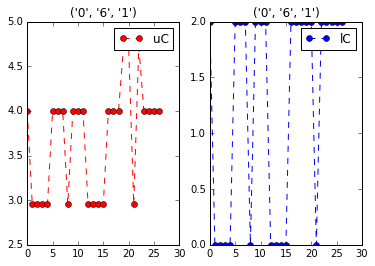

In [91]:
plot_allBsForStateList(allBs,[('0','6','1')])

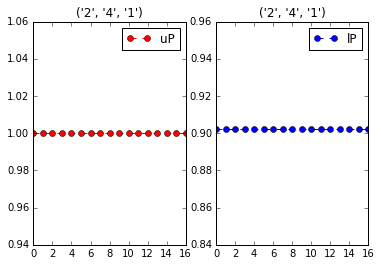

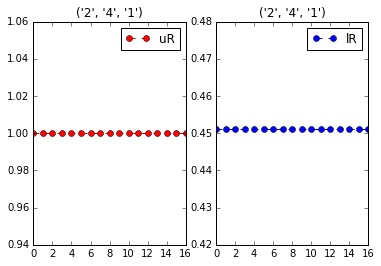

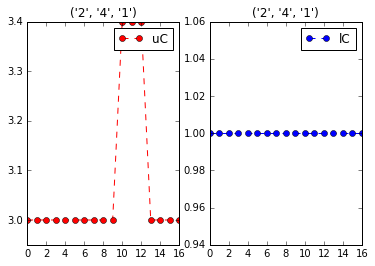

In [92]:
plot_allBsForStateList(allBs,[('2','4','1')])

In [93]:
plot_allBsForStateList(allBs,[('2','-1','1')])